# Welcome to Session 3 of Head Start Machine Learning Workshop! 
---
Today, you are going to:
- data visualization
- clean dataset
- learn about hyperparameter tuning


<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/dscum/Head-Start-ML/blob/main/session-3/workshop%203%20nb%20(complete%20ver).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

## Import Libraries and Datasets

Steps to import datasets to Google Colab:
1. Install train.csv and test.csv from Kaggle

<td>
    <a target="_blank" href="https://www.kaggle.com/c/titanic/data"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
</td>


2. Click `files` from Google Colab (left sidebar) and upload them into Google Colab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('test.csv')
test = test_df.copy()
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_df.info())
print('-'*40)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [5]:
print(train_df.columns.values)
print('-'*40)
print(test_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
----------------------------------------
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


From here, we can see that test.csv does not have `Survived` attribute, this is what we need to predict.

## Data Visualization

### Pclass

**pclass**: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

In [6]:
print(train_df['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
AxesSubplot(0.125,0.125;0.775x0.755)


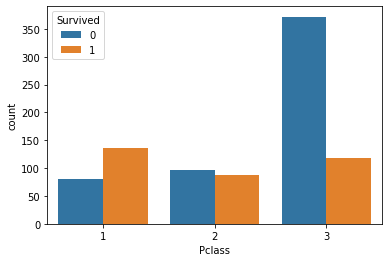

In [7]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print(sns.countplot(x='Pclass', hue='Survived', data=train_df))

Assumption 1: Upper class, higher the survival rate.

### Sex

In [8]:
print(train_df['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


      Sex  Survived
0  female  0.742038
1    male  0.188908


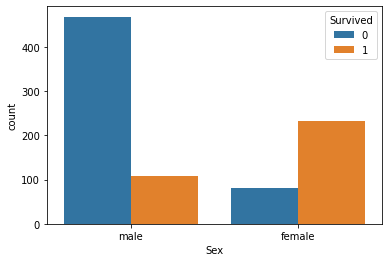

In [9]:
print(train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='Sex', hue='Survived', data=train_df)

Assumption 2: Female has higher survival rate. 

### Pclass, Sex & Age

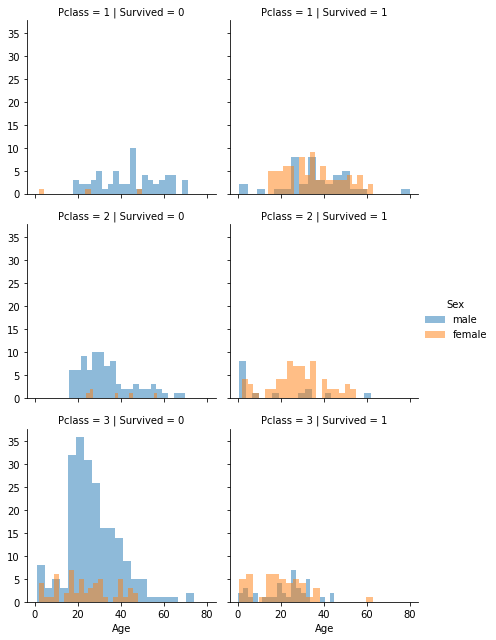

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', hue='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

In [11]:
print(train_df['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


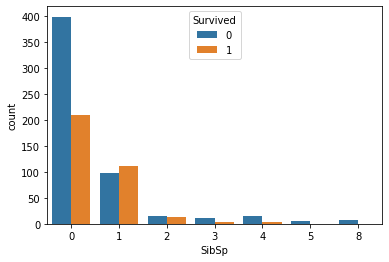

In [12]:
print(train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='SibSp', hue='Survived', data=train_df)

### Parch

**parch**: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [13]:
print(train_df['Parch'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


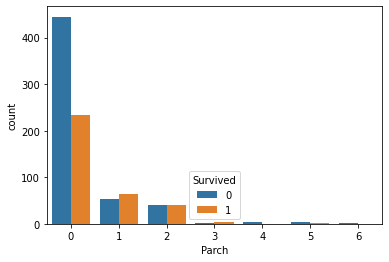

In [14]:
print(train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='Parch', hue='Survived', data=train_df)

### Embarked

**embarked**: Port of Embarkation	

C = Cherbourg, 

Q = Queenstown, 

S = Southampton

In [15]:
print(train_df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


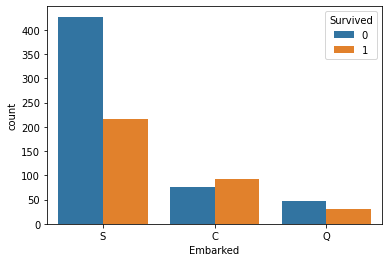

In [16]:
print(train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='Embarked', hue='Survived', data=train_df)

### Pclass, Sex & Embarked

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


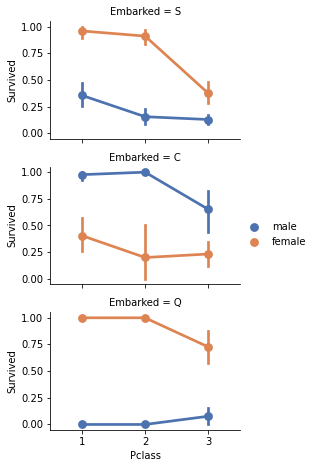

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

### Fare

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


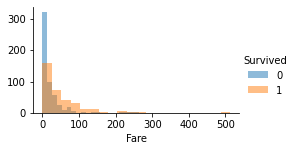

In [18]:
grid = sns.FacetGrid(train_df, hue='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Fare', alpha=.5, bins=20)
grid.add_legend();

Assumption 3: higher fare, higher survival rate

## Assumptions:
1. Upper class, higher the survival rate.
2. Female has higher survival rate.
3. Higher fare, higher survival rate 

### Correlations

In [19]:
corr_matrix = train_df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## Data Cleaning (Training Set)

### Drop `useless` columns

In [20]:
print(train_df.isnull().sum())
print(len(train_df))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
891


In [21]:
print(train_df['Cabin'].value_counts())

B96 B98        4
C23 C25 C27    4
G6             4
D              3
F33            3
              ..
C87            1
E38            1
E40            1
A34            1
B19            1
Name: Cabin, Length: 147, dtype: int64


Cabin seems not that helpful

In [22]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
# drop PassengerId, Ticket and Cabin
train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [24]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


### Fill in values

In [25]:
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
# median age of men
median_age_men = train_df[((train_df['Age'].isnull()==False) & (train_df['Sex']=='male'))]['Age'].median()

In [27]:
# Exercise 1: Median age of women
















median_age_women = train_df[((train_df['Age'].isnull()==False) & (train_df['Sex']=='female'))]['Age'].median()

In [28]:
print(median_age_men, median_age_women)

29.0 27.0


In [29]:
train_df.loc[(train_df['Age'].isnull())&(train_df['Sex']=='male'), 'Age'] = median_age_men
train_df.loc[(train_df['Age'].isnull())&(train_df['Sex']=='female'), 'Age'] = median_age_women
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### Drop `useless` row

In [30]:
train_df.dropna(inplace=True)
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
train_df.shape

(889, 9)

### Names Title/Honorific
Titles prefixing a person's name, e.g.: *Mr, Mrs, Miss, Ms, Mx, Sir, Dr, Cllr, Lady* or *Lord*.

In [32]:
train_df.head(10)['Name']

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [33]:
titles = set()
for name in train_df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(sorted(titles))

['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']


In [34]:
title_dict = {"Capt": "Officer",
              "Col": "Officer",
              "Major": "Officer",
              "Dr": "Officer",
              "Rev": "Officer",
              "Jonkheer": "Royalty",
              "Don": "Royalty",
              "Sir" : "Royalty",
              "the Countess":"Royalty",
              "Lady" : "Royalty",
              "Mme": "Mrs",
              "Ms": "Mrs",
              "Mr" : "Mr",
              "Mrs" : "Mrs",
              "Miss" : "Miss",
              "Mlle": "Miss",
              "Master" : "Master"
            }

In [35]:
train_df['Title'] = train_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_df['Title'] = train_df.Title.map(title_dict)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [36]:
train_df.Title.value_counts()

Mr         517
Miss       183
Mrs        126
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [37]:
# drop Name 
train_df.drop('Name', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


### Categorical feature

Converting categorical feature to numeric

In [38]:
# These are numerical data
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.395017,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984264,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


Three attributes are categorical: Sex, Embarked and Title.

In [40]:
train_df.Sex=train_df.Sex.map({'female':0, 'male':1})
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


In [41]:
train_df.Embarked=train_df.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,Mr
1,1,1,0,38.0,1,0,71.2833,1,Mrs
2,1,3,0,26.0,0,0,7.9250,0,Miss
3,1,1,0,35.0,1,0,53.1000,0,Mrs
4,0,3,1,35.0,0,0,8.0500,0,Mr


In [42]:
# Exercise 2: Map for `Title`
#'Mr':0,
#'Miss':1,
#'Mrs':2,
#'Master':3,
#'Officer':4,
#'Royalty':5















train_df.Title=train_df.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})

In [43]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0


### Numerical feature

In [44]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,0
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,0


In [45]:
train_df['FareRange'] = pd.cut(train_df['Fare'], 3)
train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.512, 170.776]",0.375144
1,"(170.776, 341.553]",0.647059
2,"(341.553, 512.329]",1.000000


In [46]:
train_df['FareRange'].value_counts()

(-0.512, 170.776]     869
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: FareRange, dtype: int64

In [47]:
train_df.loc[ train_df['Fare'] <= 170.776, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 170.776) & (train_df['Fare'] <= 341.553), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 341.553), 'Fare'] = 2
train_df.drop('FareRange', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,0.0,0,0
1,1,1,0,38.0,1,0,0.0,1,2
2,1,3,0,26.0,0,0,0.0,0,1
3,1,1,0,35.0,1,0,0.0,0,2
4,0,3,1,35.0,0,0,0.0,0,0


In [48]:
train_df.Age = (train_df.Age - min(train_df.Age))/(max(train_df.Age)-min(train_df.Age))
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.364099,0.524184,0.382452,0.025872,0.733408
std,0.486260,0.834700,0.477538,0.163160,1.103705,0.806761,0.178851,1.051499
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,0.359135,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,2.000000,5.000000


In [49]:
corr_matrix = train_df.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Title       0.402262
Fare        0.106226
Parch       0.083151
SibSp      -0.034040
Age        -0.078236
Pclass     -0.335549
Sex        -0.541585
Name: Survived, dtype: float64

## Data Cleaning (Test Set)
never drop a row!

### Fill in null values

In [50]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [51]:
# median age of sex
median_age_men2 = test_df[(test_df['Age'].isnull()==False)&(test_df['Sex']=='male')]['Age'].median()
median_age_women2 = test_df[(test_df['Age'].isnull()==False)&(test_df['Sex']=='female')]['Age'].median()

print(median_age_men2, median_age_women2)

27.0 27.0


In [52]:
test_df.loc[(test_df['Age'].isnull())&(test_df['Sex']=='male'), 'Age']=median_age_men2
test_df.loc[(test_df['Age'].isnull())&(test_df['Sex']=='female'), 'Age']=median_age_women2

In [53]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].median())

In [55]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Drop `useless` column

In [56]:
test_df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### Names Title/Honorific

In [57]:
test_df['Title'] = test_df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df.Title.map(title_dict)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [58]:
test_df.drop('Name', axis=1, inplace=True)

### Categorical Features

In [59]:
# Converting categorical feature to numeric
test_df.Sex=test_df.Sex.map({'female':0, 'male':1})
test_df.Embarked=test_df.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
test_df.Title=test_df.Title.map({'Mr':0, 'Miss':1, 'Mrs':2,'Master':3,'Officer':4,'Royalty':5})
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,2.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,2.0


In [60]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
dtype: int64

In [61]:
test_df[test_df.Title.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
414,1,0,39.0,0,0,108.9,1,NaN


In [62]:
# Female, 39 yo -> Mrs
test_df['Title']=test_df['Title'].fillna(2)

In [63]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

### Numerical Feature

In [64]:
train_df.loc[ train_df['Fare'] <= 170.776, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 170.776) & (train_df['Fare'] <= 341.553), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 341.553), 'Fare'] = 2
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,0.271174,1,0,0.0,0,0
1,1,1,0,0.472229,1,0,0.0,1,2
2,1,3,0,0.321438,0,0,0.0,0,1
3,1,1,0,0.434531,1,0,0.0,0,2
4,0,3,1,0.434531,0,0,0.0,0,0


In [65]:
test_df.Age = (test_df.Age - min(test_df.Age))/(max(test_df.Age)-min(test_df.Age))
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,0.452723,0,0,7.8292,2,0.0
1,3,0,0.617566,1,0,7.0000,0,2.0
2,2,1,0.815377,0,0,9.6875,2,0.0
3,3,1,0.353818,0,0,8.6625,0,0.0
4,3,0,0.287881,1,1,12.2875,0,2.0


## Model Training

### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split
X, y = train_df.drop("Survived", axis=1), train_df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=91)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((622, 8), (622,), (267, 8), (267,))

In [67]:
X_train.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title'], dtype=object)

In [68]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
from sklearn.metrics import accuracy_score
# Logistic regression's score
y_pred_lg = model_lg.predict(X_test)
accuracy_score(y_test, y_pred_lg)

0.8089887640449438

In [71]:
# Random Forest Classifier's score
y_pred_rfc = model_rfc.predict(X_test)
accuracy_score(y_test, y_pred_rfc)

0.8014981273408239

In [72]:
# select logistic regression
pred = model_lg.predict(test_df)

In [73]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [74]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })
submission.to_csv('sub01.csv', index=False)

### GridSearch

Select Random Forest Classifier
1. `n_estimators`: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
2. `max_depth`: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
3. `min_samples_split`: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
4. `min_samples_leaf`: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.

In [75]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [
     { 
      'max_depth': [5, 6, 7, 8],
      'n_estimators': [460, 480, 500]
     }
  ]


forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=10, scoring='accuracy', return_train_score=True, verbose =10)
grid_search.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START max_depth=5, n_estimators=460.............................
[CV 1/10; 1/12] END max_depth=5, n_estimators=460;, score=(train=0.851, test=0.809) total time=   0.7s
[CV 2/10; 1/12] START max_depth=5, n_estimators=460.............................
[CV 2/10; 1/12] END max_depth=5, n_estimators=460;, score=(train=0.848, test=0.865) total time=   0.7s
[CV 3/10; 1/12] START max_depth=5, n_estimators=460.............................
[CV 3/10; 1/12] END max_depth=5, n_estimators=460;, score=(train=0.858, test=0.764) total time=   0.7s
[CV 4/10; 1/12] START max_depth=5, n_estimators=460.............................
[CV 4/10; 1/12] END max_depth=5, n_estimators=460;, score=(train=0.839, test=0.865) total time=   0.7s
[CV 5/10; 1/12] START max_depth=5, n_estimators=460.............................
[CV 5/10; 1/12] END max_depth=5, n_estimators=460;, score=(train=0.841, test=0.843) total time=   0.7s
[CV 6/10; 1/12] S

In [76]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 460}

In [77]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=460, random_state=42)

In [78]:
model = RandomForestClassifier(max_depth=5, n_estimators=460, random_state=42)
model.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=460, random_state=42)

In [79]:
pred_tuning = model.predict(test_df)

In [80]:
submission_tuning = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred_tuning
    })
submission_tuning.to_csv('sub02.csv', index=False)

## Feature Engineering
Assumption: People who embarked with family has higher survival rate.

#### Training Set

In [81]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,0.271174,1,0,0.0,0,0
1,1,1,0,0.472229,1,0,0.0,1,2
2,1,3,0,0.321438,0,0,0.0,0,1
3,1,1,0,0.434531,1,0,0.0,0,2
4,0,3,1,0.434531,0,0,0.0,0,0


In [82]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [83]:
train_df['isAlone'] = 0
train_df.loc[ train_df['FamilySize']==1, 'isAlone'] = 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,0,3,1,0.271174,1,0,0.0,0,0,2,0
1,1,1,0,0.472229,1,0,0.0,1,2,2,0
2,1,3,0,0.321438,0,0,0.0,0,1,1,1
3,1,1,0,0.434531,1,0,0.0,0,2,2,0
4,0,3,1,0.434531,0,0,0.0,0,0,1,1


In [84]:
train_df[['isAlone', 'Survived']].groupby(['isAlone'], as_index=False).mean().sort_values(by='isAlone', ascending=False)

,isAlone,Survived
1,1,0.300935
0,0,0.505650


In [85]:
train_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,1,0.271174,0.0,0,0,0
1,1,1,0,0.472229,0.0,1,2,0
2,1,3,0,0.321438,0.0,0,1,1
3,1,1,0,0.434531,0.0,0,2,0
4,0,3,1,0.434531,0.0,0,0,1


#### Testing Set

In [86]:
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['isAlone'] = 0
test_df.loc[test_df['FamilySize']==1, 'isAlone']=1
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,3,1,0.452723,0,0,7.8292,2,0.0,1,1
1,3,0,0.617566,1,0,7.0000,0,2.0,2,0
2,2,1,0.815377,0,0,9.6875,2,0.0,1,1
3,3,1,0.353818,0,0,8.6625,0,0.0,1,1
4,3,0,0.287881,1,1,12.2875,0,2.0,3,0


In [87]:
test_df.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

#### Model Training

In [88]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']

In [89]:
%%time
param_grid = [
     { 
      'max_depth': [5, 6, 7, 8],
      'n_estimators': [300, 350, 400]
     }
  ]

forest_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_clf, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True, verbose =10)
grid_search.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START max_depth=5, n_estimators=300.............................
[CV 1/10; 1/12] END max_depth=5, n_estimators=300;, score=(train=0.850, test=0.787) total time=   0.4s
[CV 2/10; 1/12] START max_depth=5, n_estimators=300.............................
[CV 2/10; 1/12] END max_depth=5, n_estimators=300;, score=(train=0.838, test=0.798) total time=   0.4s
[CV 3/10; 1/12] START max_depth=5, n_estimators=300.............................
[CV 3/10; 1/12] END max_depth=5, n_estimators=300;, score=(train=0.848, test=0.764) total time=   0.4s
[CV 4/10; 1/12] START max_depth=5, n_estimators=300.............................
[CV 4/10; 1/12] END max_depth=5, n_estimators=300;, score=(train=0.831, test=0.876) total time=   0.5s
[CV 5/10; 1/12] START max_depth=5, n_estimators=300.............................
[CV 5/10; 1/12] END max_depth=5, n_estimators=300;, score=(train=0.848, test=0.854) total time=   0.4s
[CV 6/10; 1/12] S

In [90]:
grid_search.best_params_

{'max_depth': 6, 'n_estimators': 350}

In [91]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=350, random_state=42)

In [92]:
model = RandomForestClassifier(max_depth=6, n_estimators=350, random_state=42)
model.fit(X, y)
pred_tuning_fe = model.predict(test_df)
submission_tuning_fe = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred_tuning_fe
    })
submission_tuning_fe.to_csv('sub03.csv', index=False)

#Improvements:
- Use One Hot Encoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) instead of Ordinal Encoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) for `Embarked`
- Use Pipeline for Data Cleaning (training set and testing set): https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- Create a custom transformer by inheriting TransformerMixin (https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) and Base Estimator
(https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)
- Explore https://scikit-learn.org/stable/ for other models to train
- Hyperparameter Tuning 
  - use RandomizedSearch (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) before GridSearch (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
  - tune more features e.g. `min_samples_split` for `RandomForestClassifier`
- Feature Engineering
  - find potential aggregated variables

#Reading Materials:
- https://www.kaggle.com/learn/intermediate-machine-learning
- top solution: https://www.kaggle.com/startupsci/titanic-data-science-solutions 